<center>
<img src="https://www.plri.de/assets/images/logo_plri_de.png"
width="200">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Siegel_TU_Braunschweig_transparent.svg/800px-Siegel_TU_Braunschweig_transparent.svg.png"
width="250">
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3d/Medizinische_Hochschule_Hannover_logo.svg"
width="250">
<img src="https://images.seeklogo.com/logo-png/38/2/universidad-nacional-autonoma-de-mexico-unam-logo-png_seeklogo-387361.png" width="110">
</center>

<font color="Teal" face="Georgia,arial">
  <h1 align="center"></h1>
  <h2 align="center"><i><b>Image Detection</b></i></h2>
  </font>
  <font color="Black" face="Georgia,arial">
  <h5 align="center"><i><b>Prepared by volunteers</b></i></h5>
  <h5 align="center"><i><b>mail: unam.tubs@gmail.com</b></i></h5>
</font>

**CONTENTS**

####In this notebook, we will build and train a deep learning model to classify images as either containing a dog or not. Using a small dataset of 100 images, we will learn how to preprocess images, apply transformations, and train a convolutional neural network (based on a pre-trained ResNet) to recognize patterns in images. After training, we will test the model on new images and interpret the results, including the prediction and confidence score.

####This code helps us understand how an AI model detects patterns in images. Right now, it is trained to tell if there is a dog in the image or not. In medicine, the same logic can be used to detect whether a tumor, a fracture, or a disease marker is present in a medical scan.
----------------------------------------

**🚀 HOW TO USE THE CODE?**

1. Open the Day4_TUBS_UNAM_Image_Detection.ipynb notebook in Google Colab.

* Go to the menu: File > Save a copy to Drive
* Gray cells with code are executed with Shift + Enter

----------------------------------------

**🔧 HOW TO RUN THE NOTEBOOK?**

1. Locate the block of code you want to run.
In the upper left corner of the block, click on the triangle button ▶️

2. Wait for a green check mark ✅ to appear next to the block: this indicates that it has finished executing.

----------------------------------------

**📝 ADDITIONAL NOTES**

- The code may take between 10 and 15 minutes to load.

----------------------------------------
**🙋 IF YOU HAVE ANY QUESTIONS ABOUT HOW TO USE THE CODE, YOU CAN SEND US AN EMAIL**

Email for questions -- unam.tubs@gmail.com

Attach a screenshot if you get an error message.


## First, let's run all the libraries we're going to use for this exercise.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from google.colab import files
import zipfile

## Run this code to upload and unzip:

In [2]:
print("📁 Uploading ZIP file...")
uploaded = files.upload()  # A button will appear for you to select your ZIP code.

# Automatically decompress
for filename in uploaded.keys():
    print(f"Unzipping {filename}...")
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall('.')

    # Delete the ZIP file after unzipping
    os.remove(filename)
    print(f"✅ {filename} unzipped and deleted")

# Verify that the folders were created
print("\n📂 Folders created:")
for root, dirs, files in os.walk('.'):
    level = root.replace('.', '').count(os.sep)
    indent = ' ' * 2 * level
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 2 * (level + 1)
    for file in files[:3]:
        print(f'{subindent}{file}')
    if len(files) > 3:
        print(f'{subindent}... and {len(files)-3} more files')

📁 Uploading ZIP file...


Saving with_100.zip to with_100.zip
Unzipping with_100.zip...
✅ with_100.zip unzipped and deleted

📂 Folders created:
./
  .config/
    .last_survey_prompt.yaml
    gce
    config_sentinel
    ... and 5 more files
    logs/
      2025.08.28/
        13.42.14.257094.log
        13.42.40.032629.log
        13.41.44.528882.log
        ... and 3 more files
    configurations/
      config_default
  with_100/
    no_dogs/
      45.jpg
      26.jpg
      24.jpg
      ... and 47 more files
    dogs/
      45.jpg
      26.jpg
      24.jpg
      ... and 47 more files
  sample_data/
    README.md
    anscombe.json
    california_housing_test.csv
    ... and 3 more files



## **Cell 1: Model Training**

In this step, we train the model using the images previously loaded from the ZIP folder, which contains 100 images including examples of dogs and cats. This initial training allows the model to learn to identify patterns and features from both categories before making predictions.


Using device: cpu
📁 Loading dataset...
✅ Dataset successfully loaded:
   Total: 100 images
   With dogs: 50 images
   Without dogs: 50 images
📊 Dataset split:
   Training: 80 images
   Validation: 20 images


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 90.8MB/s]

🤖 Model created on cpu

🚀 Starting training (17 epochs)...
🚀 Starting training...


Epoch [1/17], Batch [0/8], Loss: 0.8513
Epoch [1/17]: Loss: 0.5073, Val Accuracy: 0.6000
Epoch [2/17], Batch [0/8], Loss: 0.3696
Epoch [2/17]: Loss: 0.3043, Val Accuracy: 0.7000
Epoch [3/17], Batch [0/8], Loss: 0.4749
Epoch [3/17]: Loss: 0.3509, Val Accuracy: 0.5500
Epoch [4/17], Batch [0/8], Loss: 0.3762
Epoch [4/17]: Loss: 0.4512, Val Accuracy: 0.6000
Epoch [5/17], Batch [0/8], Loss: 0.2713
Epoch [5/17]: Loss: 0.6339, Val Accuracy: 0.7000
Epoch [6/17], Batch [0/8], Loss: 0.2783
Epoch [6/17]: Loss: 0.4318, Val Accuracy: 0.7000
Epoch [7/17], Batch [0/8], Loss: 0.3887
Epoch [7/17]: Loss: 0.3636, Val Accuracy: 0.6000
Epoch [8/17], Batch [0/8], Loss: 0.2159
Epoch [8/17]: Loss: 0.2887, Val Accuracy: 0.7500
Epoch [9/17], Batch [0/8], Loss: 0.1957
Epoch [9/17]: Loss: 0.3293, Val Accuracy: 0.5500
Epoch [10/17], Batch [0/8], Loss: 0.1176
Epoch [10/17]: Loss: 0.2581, Val Accuracy: 0.6000
Epoch [11/17], Batch [0/8], Loss: 0.2699
Epoch [11/17]: Loss: 0.4129, Val Accuracy: 0.6500
Epoch [12/17], Ba

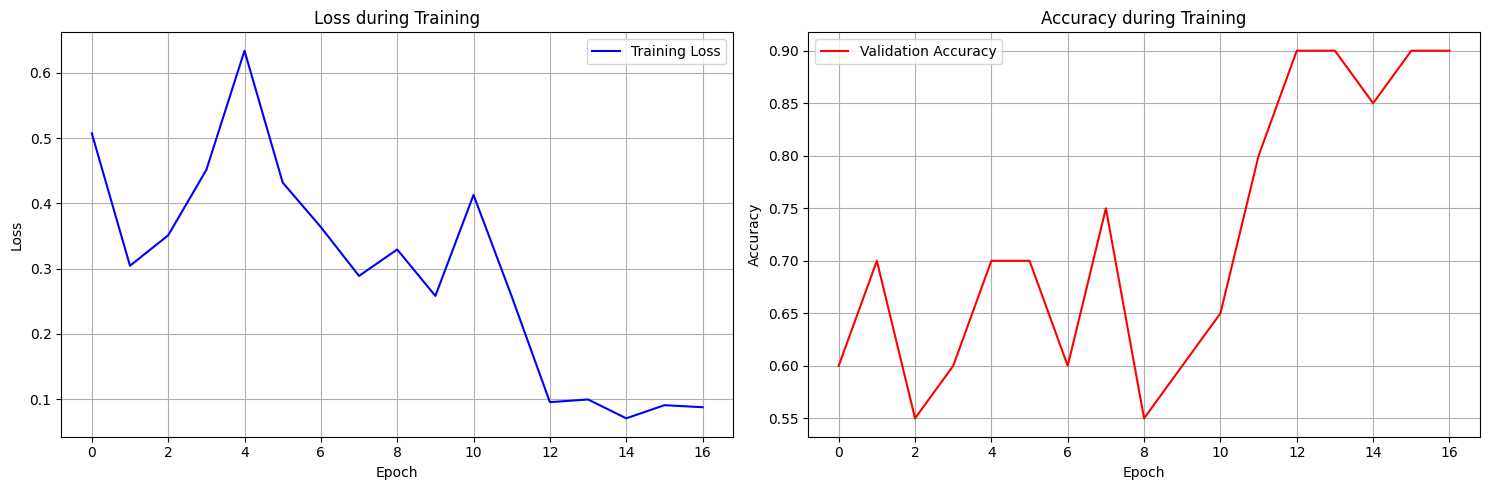

🎉 Training completed!
Now you can run the next part to identify whether or not there is a dog in your image and make predictions.


In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Custom dataset for classification
class DogDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return image, label

# Classification model based on pre-trained ResNet
class DogClassifier(nn.Module):
    def __init__(self, pretrained=True):
        super(DogClassifier, self).__init__()
        self.backbone = models.resnet18(pretrained=pretrained)
        self.backbone.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(self.backbone.fc.in_features, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.backbone(x)

# Optimized training function for 600 images
def train_model(model, train_loader, val_loader, num_epochs=25, learning_rate=0.001):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

    train_losses = []
    val_accuracies = []
    best_val_acc = 0.0

    print('🚀 Starting training...')

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        running_loss = 0.0

        for batch_idx, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if batch_idx % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx}/{len(train_loader)}], Loss: {loss.item():.4f}')

        # Validation phase
        model.eval()
        val_predictions = []
        val_labels = []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images).squeeze()
                predictions = (outputs > 0.5).float()

                val_predictions.extend(predictions.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())

        epoch_loss = running_loss / len(train_loader)
        val_accuracy = accuracy_score(val_labels, val_predictions)

        train_losses.append(epoch_loss)
        val_accuracies.append(val_accuracy)

        # Save best model
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            torch.save(model.state_dict(), 'best_dog_classifier_model.pth')

        print(f'Epoch [{epoch+1}/{num_epochs}]: Loss: {epoch_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')
        scheduler.step()

    return train_losses, val_accuracies

def load_dataset_from_folders(dogs_folder, no_dogs_folder):
    """Automatically loads from organized folders"""
    dog_images = glob.glob(os.path.join(dogs_folder, "*.jpg")) + \
                 glob.glob(os.path.join(dogs_folder, "*.png")) + \
                 glob.glob(os.path.join(dogs_folder, "*.jpeg"))

    no_dog_images = glob.glob(os.path.join(no_dogs_folder, "*.jpg")) + \
                    glob.glob(os.path.join(no_dogs_folder, "*.png")) + \
                    glob.glob(os.path.join(no_dogs_folder, "*.jpeg"))

    all_images = dog_images + no_dog_images
    all_labels = [1] * len(dog_images) + [0] * len(no_dog_images)

    return all_images, all_labels

def evaluate_model(model, test_loader):
    """Evaluates the model and displays metrics"""
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).squeeze()
            predictions = (outputs > 0.5).float()

            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions)
    recall = recall_score(all_labels, all_predictions)

    print(f'📊 Final metrics:')
    print(f'   Accuracy: {accuracy:.4f}')
    print(f'   Precision: {precision:.4f}')
    print(f'   Recall: {recall:.4f}')

    return accuracy, precision, recall

# === OPTIMIZED CONFIGURATION FOR 100 IMAGES ===
IMG_SIZE = 224
BATCH_SIZE = 10
EPOCHS = 17
LEARNING_RATE = 0.001

# Improved transformations for large dataset
train_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# === LOAD DATASET ===
# 👇 CHANGE THESE PATHS TO YOUR ACTUAL FOLDERS
dogs_folder = "with_100/dogs"        # 300 images with dogs
no_dogs_folder = "with_100/no_dogs"  # 300 images without dogs

print("📁 Loading dataset...")

if not os.path.exists(dogs_folder) or not os.path.exists(no_dogs_folder):
    print("❌ ERROR: Dataset folders not found")
    print(f"   Expected: {dogs_folder} and {no_dogs_folder}")
    print("   Upload your images to these folders in Colab")
else:
    # Load images
    all_images, all_labels = load_dataset_from_folders(dogs_folder, no_dogs_folder)

    print(f"✅ Dataset successfully loaded:")
    print(f"   Total: {len(all_images)} images")
    print(f"   With dogs: {sum(all_labels)} images")
    print(f"   Without dogs: {len(all_labels) - sum(all_labels)} images")

    # Split dataset (80% training, 20% validation)
    train_images, val_images, train_labels, val_labels = train_test_split(
        all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels
    )

    print(f"📊 Dataset split:")
    print(f"   Training: {len(train_images)} images")
    print(f"   Validation: {len(val_images)} images")

    # Create datasets and loaders
    train_dataset = DogDataset(train_images, train_labels, train_transform)
    val_dataset = DogDataset(val_images, val_labels, val_transform)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

    # Create and train model
    model = DogClassifier(pretrained=True).to(device)
    print(f"🤖 Model created on {device}")

    # TRAINING
    print(f"\n🚀 Starting training ({EPOCHS} epochs)...")
    train_losses, val_accuracies = train_model(model, train_loader, val_loader,
                                             num_epochs=EPOCHS, learning_rate=LEARNING_RATE)

    # Save final model
    torch.save(model.state_dict(), 'dog_classifier_model.pth')
    print("💾 Model saved as 'dog_classifier_model.pth'")

    # Final evaluation
    evaluate_model(model, val_loader)

    # Training plots
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(train_losses, 'b-', label='Training Loss')
    plt.title('Loss during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, 'r-', label='Validation Accuracy')
    plt.title('Accuracy during Training')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print("🎉 Training completed!")
    print("Now you can run the next part to identify whether or not there is a dog in your image and make predictions.")


##**Cell 2: Image Prediction**
In this step, we test the trained model by analyzing a single image. Using the patterns learned from the training set (dogs and cats), the model will predict whether the image contains a dog and provide a confidence score for its decision.

In [11]:
!wget -q -O own_img1.jpg "https://raw.githubusercontent.com/ASRR7/unam_tubs/refs/heads/main/download.jpeg"
img_own1 = "/content/own_img1.jpg"

In [12]:
!wget -q -O own_img2.jpg "https://raw.githubusercontent.com/ASRR7/unam_tubs/refs/heads/main/Jotchua.webp"
img_own2 = "/content/own_img2.jpg"

In [15]:
def image_to_tensor(image, size=224):
    """Converts a PIL image to a tensor for the model"""
    transform = transforms.Compose([
        transforms.Resize((size, size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                           std=[0.229, 0.224, 0.225])
    ])
    image_tensor = transform(image).unsqueeze(0)
    return image_tensor.to(device)

def predict_single_image(model, image_path, threshold=0.5):
    """Predicts whether there is a dog in a single image"""
    model.eval()

    try:
        # Load and process the image
        image = Image.open(image_path).convert('RGB')
        image_tensor = image_to_tensor(image)

        with torch.no_grad():
            output = model(image_tensor).squeeze()
            probability = output.item()
            prediction = probability > threshold

        return prediction, probability, image

    except Exception as e:
        print(f"❌ Error processing the image: {e}")
        return None, None, None

# === USE THE TRAINED MODEL ===

# Load trained model

def class_image(img_own):
  try:
      # Recreate the model with the same architecture
      trained_model = DogClassifier(pretrained=False).to(device)
      trained_model.load_state_dict(torch.load('dog_classifier_model.pth', map_location=device))
      print("✅ Model loaded successfully")

      # 👇 CHANGE THIS PATH TO YOUR IMAGE
      image_path = img_own  # Path to your test image

      if os.path.exists(image_path):
          # Make prediction
          print(f"🔍 Analyzing image: {image_path}")
          prediction, probability, image = predict_single_image(trained_model, image_path)

          if prediction is not None:
              # Display result
              result_text = "DOG DETECTED" if prediction else "NO DOG DETECTED"
              confidence = probability if prediction else (1 - probability)

              print(f"\n🎯 RESULT: {result_text}")
              print(f"   Confidence: {confidence:.1%}")
              print(f"   Dog probability: {probability:.3f}")

              # Visualize result
              plt.figure(figsize=(10, 8))
              plt.imshow(image)

              color = 'green' if prediction else 'red'
              title = f'{result_text}\nConfidence: {confidence:.1%}\nProbability: {probability:.3f}'

              plt.title(title, color=color, fontsize=16, fontweight='bold')
              plt.axis('off')
              plt.tight_layout()
              plt.show()
      else:
          print(f"❌ Image not found: {image_path}")
          print("   Upload an image to Colab and update the path in the code")

  except FileNotFoundError:
      print("❌ Trained model not found")
      print("   Please run CELL 1 first to train the model")
  except Exception as e:
      print(f"❌ Error: {e}")


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


✅ Model loaded successfully
🔍 Analyzing image: /content/own_img1.jpg

🎯 RESULT: DOG DETECTED
   Confidence: 93.0%
   Dog probability: 0.930


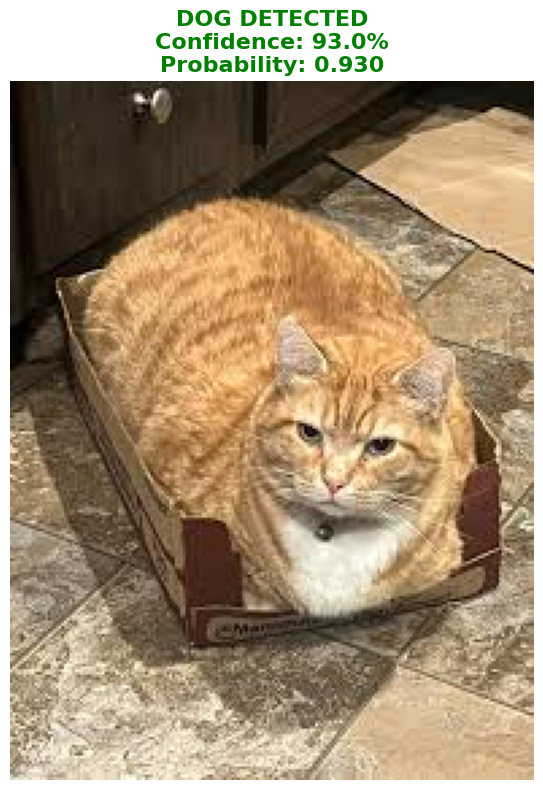

In [16]:
class_image(img_own=img_own1)

✅ Model loaded successfully
🔍 Analyzing image: /content/own_img2.jpg

🎯 RESULT: DOG DETECTED
   Confidence: 98.6%
   Dog probability: 0.986


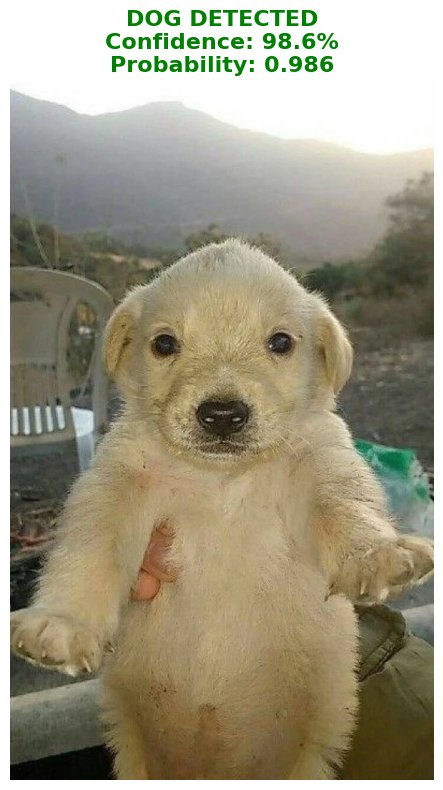

In [17]:
class_image(img_own=img_own2)

#**We want to see your creation!**

##Please **upload your image to Google Classroom** on the day of the activity.

##👉 [Click here to upload your image](https://classroom.google.com/w/Nzk4ODM1MTg3OTE0/t/all)


**Remember: each result is unique, and we can all learn from seeing each other's work. Go ahead and share it!**